<a href="https://colab.research.google.com/github/charanchandu/ECE539_FinalProject/blob/main/Project_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
senti_df = pd.read_csv('finalSentimentdata2.csv')

In [2]:
senti_df

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...
...,...,...,...
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...


In [3]:
senti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3090 non-null   int64 
 1   sentiment   3090 non-null   object
 2   text        3090 non-null   object
dtypes: int64(1), object(2)
memory usage: 72.5+ KB


In [4]:
senti_df['sentiment'].nunique

<bound method IndexOpsMixin.nunique of 0         sad
1         joy
2         joy
3         sad
4         sad
        ...  
3085      sad
3086    anger
3087      joy
3088      sad
3089      sad
Name: sentiment, Length: 3090, dtype: object>

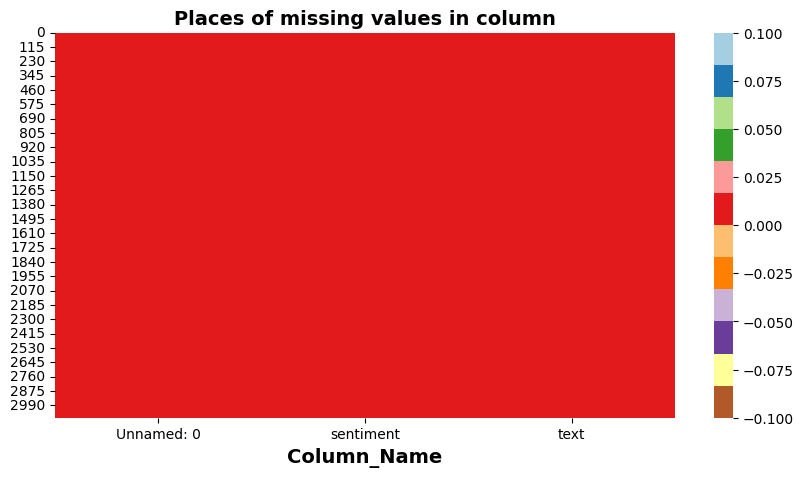

In [5]:
import matplotlib.pyplot as plt
import seaborn           as sns
import plotly.graph_objs as go
import plotly.express    as px
import nltk
import re
import string
plt.figure(figsize=(10, 5))
sns.heatmap(senti_df.isnull(), cbar=True, cmap='Paired_r')
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=14)
plt.show()

In [6]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from collections import Counter

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

punc = string.punctuation
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    """Map POS tag to first character used by WordNetLemmatizer."""
    tag = tag[0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(text):
    # Making text lowercase
    text = text.lower()

    # Removing text in square brackets, links, punctuation, and words containing numbers
    pattern = r'\[.*?\]|\bhttps?://\S+|www\.\S+|<.*?>+|[{}]|\w*\d\w*'.format(re.escape(punc))
    text = re.sub(pattern, '', text)

    # Tokenizing the text and remove stopwords
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]

    # Lemmatizing words with POS tagging
    words = pos_tag(words)
    words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in words]

    # Rejoining the words to form the cleaned text
    text = " ".join(words)

    return text

# Applying the clean_text function to the 'text' column
senti_df['text'] = senti_df['text'].apply(clean_text)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [7]:
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

def remove_emoji(text):
    return emoji_pattern.sub(r'', text)

senti_df['text'] = senti_df['text'].apply(remove_emoji)


In [8]:
senti_df.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree poor india treat badly poor seek live si...
1,1431,joy,could spend cutie vc sakshis n g h coast cross...
2,654,joy,nature conservation remain priority post coron...
3,2530,sad,coronavirus disappear italy show intellectual ...
4,2296,sad,uk record low daily virus death toll since sta...


In [10]:
from sklearn.model_selection import train_test_split

# Splitting the data into Training and Testing sets (70% training, 30% test+validation)
train, test_valid = train_test_split(senti_df, test_size=0.3, random_state=0, stratify=senti_df.sentiment.values)

# Splitting the remaining data (test_valid) into Test and Validation sets (50% each)
test, valid = train_test_split(test_valid, test_size=0.5, random_state=0, stratify=test_valid.sentiment.values)

print("train shape:", train.shape)
print("valid shape:", valid.shape)
print("test shape:", test.shape)


train shape: (2163, 3)
valid shape: (464, 3)
test shape: (463, 3)


In [11]:
from sklearn.feature_extraction.text import CountVectorizer
stop = set(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error='replace', stop_words=list(stop))  # Convert the set to a list

X_train1 = vectorizer.fit_transform(train['text'].values)
X_valid1 = vectorizer.transform(valid['text'].values)

y_train1 = train['sentiment'].values
y_valid1 = valid['sentiment'].values

print(f"X_train.shape: {X_train1.shape}")
print(f"X_valid.shape: {X_valid1.shape}")
print(f"y_train.shape: {y_train1.shape}")
print(f"y_valid.shape: {y_valid1.shape}")


X_train.shape: (2163, 6714)
X_valid.shape: (464, 6714)
y_train.shape: (2163,)
y_valid.shape: (464,)


In [12]:
!pip install nlpaug
import nlpaug.augmenter.word as naw

# Function for data augmentation using synonym replacement
def augment_text(sentiment, text, aug_p=0.3, aug_max=5):
    aug = naw.SynonymAug(aug_src='wordnet')
    augmented_texts = [aug.augment(text) for _ in range(aug_max)]
    augmented_texts.append(text)  # Include original text in the augmented data
    augmented_sentiments = [sentiment] * (aug_max + 1)
    return pd.DataFrame({'sentiment': augmented_sentiments, 'text': augmented_texts})


# Applying data augmentation to the 'text' column in the original dataset and creating a new DataFrame
augmented_data = train.apply(lambda row: augment_text(row['sentiment'], row['text'], aug_p=0.3, aug_max=5), axis=1)

# Concatenating the augmented DataFrames
augmented_train_df = pd.concat(augmented_data.tolist(), ignore_index=True)
augmented_train_df = pd.concat([train, augmented_train_df], ignore_index=True)

# Saving the augmented DataFrame as a CSV file
augmented_train_df.to_csv('augmented_dataset.csv', index=False)

print("Augmented dataset saved as 'augmented_dataset.csv'")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 7.4 MB/s eta 0:00:00
Augmented dataset saved as 'augmented_dataset.csv'


In [17]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Function for text preprocessing
def preprocess_text(text):
    # Check if text is not NaN (missing value)
    if isinstance(text, str):
        # Make text lowercase
        text = text.lower()

        # Remove text in square brackets, links, punctuation, and words containing numbers
        text = re.sub(r'[\'\[\]]', '', text)
        return text

        # Tokenization and removing stopwords
        stop_words = set(stopwords.words('english'))
        words = nltk.word_tokenize(text)
        words = [word for word in words if word not in stop_words]

        # Lemmatization
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]

        # Join the processed words back to form the preprocessed text
        preprocessed_text = ' '.join(words)
        return preprocessed_text
    else:
        return ""  # Return an empty string for missing values

# Load the augmented dataset
augmented_df = pd.read_csv('augmented_dataset.csv')

# Preprocess the 'text' column
augmented_df['preprocessed_text'] = augmented_df['text'].apply(preprocess_text)


# Split the data into training and testing sets
X = augmented_df['preprocessed_text'].astype(str)
y = augmented_df['sentiment']
# Split the data into training and test sets (85% training and 15% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Split the training data into training and validation sets (70% training and 15% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

# Vectorize the text data using CountVectorizer
stop = set(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error='replace', stop_words=list(stop))  # Convert the set to a list

X_train_counts = vectorizer.fit_transform(X_train.values)
X_val_counts = vectorizer.transform(X_val.values)
X_test_counts = vectorizer.transform(X_test.values)

print(f"X_train.shape: {X_train_counts.shape}")
print(f"X_valid.shape: {X_val_counts.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_valid.shape: {y_val.shape}")



X_train.shape: (10938, 11074)
X_valid.shape: (1931, 11074)
y_train.shape: (10938,)
y_valid.shape: (1931,)


In [18]:
print(augmented_df['preprocessed_text'])
augmented_df[['sentiment', 'preprocessed_text']].to_csv('preprocessed_dataset.csv', index=False)

0        honble prime minister bihar chief minister req...
1        ive always type need control know next coronav...
2        respect sir collegues terminate school without...
3        rather u guy r safe indoors pls say thanks enj...
4                          finally accept credit go medium
                               ...                        
15136    parkland reopen aftermath quake major stadium ...
15137    green reopen backwash earthquake major stadium...
15138    park reopen backwash seism major stadium also ...
15139    park reopen aftermath quake major arena also o...
15140    park reopen aftermath quake major stadium also...
Name: preprocessed_text, Length: 15141, dtype: object


In [19]:
from sklearn.svm import SVC
# Initializing the SVM classifier
svm_classifier = SVC()

# Training the classifier
svm_classifier.fit(X_train_counts, y_train)

# Loading the original dataset (non-augmented data)
original_df = pd.read_csv('finalSentimentdata2.csv')
original_df['preprocessed_text'] = original_df['text'].apply(preprocess_text)

# Spliting the data into testing and validation sets (no need to augment the original data)
X_test_original, X_val_original, y_test_original, y_val_original = train_test_split(original_df['preprocessed_text'], original_df['sentiment'], test_size=0.15, random_state=42)

# Transforming the original data using the same CountVectorizer
X_test_original_counts = vectorizer.transform(X_test_original.values)
X_val_original_counts = vectorizer.transform(X_val_original.values)

# Printing the shapes of the original data
print("\nOriginal Data:")
print("Validation shape (original data):", X_val_original_counts.shape, y_val_original.shape)
print("Test shape (original data):", X_test_original_counts.shape, y_test_original.shape)




Original Data:
Validation shape (original data): (464, 11074) (464,)
Test shape (original data): (2626, 11074) (2626,)


In [45]:
stop = set(stopwords.words('english'))

# Transforming the original validation and test sets using the same CountVectorizer
X_val_original_counts = vectorizer.transform(X_val_original.values)
X_test_original_counts = vectorizer.transform(X_test_original.values)

# Making predictions on the validation set using the SVM classifier trained on augmented data
y_pred_val_original = svm_classifier.predict(X_val_original_counts)

#Printing Training Accuracy
y_pred_train_rf = svm_classifier.predict(X_train_counts)
accuracy_train_svm = accuracy_score(y_train, y_pred_train_rf)
print("Training Accuracy (SVM):", accuracy_train_svm)

# Calculating accuracy for validation set (original data)
y_pred_val_svm = svm_classifier.predict(X_val_original_counts)
accuracy_val_svm = accuracy_score(y_val_original, y_pred_val_svm)
print("Validation Accuracy (original data):", accuracy_val_svm)

# Making predictions on the test set using the SVM classifier trained on the original data
y_pred_test_original = svm_classifier.predict(X_test_original_counts)

# Calculating accuracy for test set (original data)
accuracy_test_svm = accuracy_score(y_test_original, y_pred_test_original)
print("Test Accuracy (original data):", accuracy_test_svm)

# Printing classification report for the validation set
svm_validation_creport = (classification_report(y_val_original, y_pred_val_svm))
print(f"Validation Classification Report:\n {svm_validation_creport}")

# Printing classification report for the test set
svm_test_creport = (classification_report(y_test_original, y_pred_test_original))
print(f"Test Classification Report:\n {svm_test_creport}")


Training Accuracy (SVM): 0.990766136405193
Validation Accuracy (original data): 0.8405172413793104
Test Accuracy (original data): 0.8564356435643564
Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.81      0.83      0.82       111
        fear       0.85      0.80      0.82       127
         joy       0.79      0.91      0.85       112
         sad       0.93      0.83      0.88       114

    accuracy                           0.84       464
   macro avg       0.84      0.84      0.84       464
weighted avg       0.85      0.84      0.84       464

Test Classification Report:
               precision    recall  f1-score   support

       anger       0.85      0.83      0.84       656
        fear       0.88      0.81      0.85       674
         joy       0.79      0.95      0.86       615
         sad       0.92      0.84      0.88       681

    accuracy                           0.86      2626
   macro avg       0.86   

In [46]:
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the classifier on the original training data
rf_classifier.fit(X_train_counts, y_train)

y_pred_train_rf = rf_classifier.predict(X_train_counts)
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
print("Training Accuracy (Random Forest):", accuracy_train_rf)

# Making predictions on the validation set using the Random Forest classifier trained on the original data
y_pred_val_rf = rf_classifier.predict(X_val_original_counts)

# Calculating accuracy for the validation set (original data)
accuracy_val_rf = accuracy_score(y_val_original, y_pred_val_rf)
print("Validation Accuracy (Random Forest):", accuracy_val_rf)

# Printing classification report for the validation set
rf_validation_creport = (classification_report(y_val_original, y_pred_val_rf))
print(f"Validation Classification Report:\n {rf_validation_creport}")

# Making predictions on the test set using the Random Forest classifier trained on the original data
y_pred_test_rf = rf_classifier.predict(X_test_original_counts)

# Calculating accuracy for the test set (original data)
accuracy_test_rf = accuracy_score(y_test_original, y_pred_test_rf)
print("Test Accuracy (Random Forest):", accuracy_test_rf)

# Printing classification report for the test set
rf_test_creport = (classification_report(y_test_original, y_pred_test_rf))
print(f"Test Classification Report:\n {rf_test_creport}")


Training Accuracy (Random Forest): 1.0
Validation Accuracy (Random Forest): 0.8275862068965517
Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.73      0.82      0.77       111
        fear       0.85      0.69      0.76       127
         joy       0.80      0.92      0.86       112
         sad       0.94      0.90      0.92       114

    accuracy                           0.83       464
   macro avg       0.83      0.83      0.83       464
weighted avg       0.83      0.83      0.83       464

Test Accuracy (Random Forest): 0.8583396801218584
Test Classification Report:
               precision    recall  f1-score   support

       anger       0.84      0.84      0.84       656
        fear       0.89      0.80      0.84       674
         joy       0.80      0.93      0.86       615
         sad       0.92      0.86      0.89       681

    accuracy                           0.86      2626
   macro avg       0.86      0

In [47]:
# Initialize the Logistic Regression classifier
logistic_regression_classifier = LogisticRegression(max_iter=1000)

# Train the classifier on the original training data
logistic_regression_classifier.fit(X_train_counts, y_train)

y_pred_train_lr = logistic_regression_classifier.predict(X_train_counts)
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
print("Training Accuracy (Logistic Regression):", accuracy_train_lr)

# Make predictions on the validation set using the Logistic Regression classifier trained on the original data
y_pred_val_lr = logistic_regression_classifier.predict(X_val_original_counts)

# Calculate accuracy for the validation set (original data)
accuracy_val_lr = accuracy_score(y_val_original, y_pred_val_lr)
print("Validation Accuracy (Logistic Regression):", accuracy_val_lr)

# Printing classification report for the validation set
lr_validation_creport = (classification_report(y_val_original, y_pred_val_lr))
print(f"Validation Classification Report:\n {lr_validation_creport}")

# Making predictions on the test set using the Logistic Regression classifier trained on the original data
y_pred_test_lr = logistic_regression_classifier.predict(X_test_original_counts)

# Calculating accuracy for the test set (original data)
accuracy_test_lr = accuracy_score(y_test_original, y_pred_test_lr)
print("Test Accuracy (Logistic Regression):", accuracy_test_lr)

# Printing classification report for the test set
lr_test_creport = (classification_report(y_test_original, y_pred_test_lr))
print(f"Test Classification Report:\n {lr_test_creport}")


Training Accuracy (Logistic Regression): 0.997805814591333
Validation Accuracy (Logistic Regression): 0.8642241379310345
Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.83      0.82      0.82       111
        fear       0.84      0.82      0.83       127
         joy       0.86      0.94      0.90       112
         sad       0.94      0.89      0.91       114

    accuracy                           0.86       464
   macro avg       0.87      0.87      0.86       464
weighted avg       0.86      0.86      0.86       464

Test Accuracy (Logistic Regression): 0.854912414318355
Test Classification Report:
               precision    recall  f1-score   support

       anger       0.84      0.83      0.84       656
        fear       0.84      0.81      0.83       674
         joy       0.83      0.95      0.89       615
         sad       0.91      0.84      0.87       681

    accuracy                           0.85      2626

In [48]:
from sklearn.naive_bayes import MultinomialNB
# Initializing the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Training the classifier on the original training data
naive_bayes_classifier.fit(X_train_counts, y_train)

# Making predictions on the validation set using the Naive Bayes classifier trained on the original data
y_pred_val_nb = naive_bayes_classifier.predict(X_val_original_counts)

accuracy_train_nb = accuracy_score(y_train, y_pred_train_rf)
print("Training Accuracy (Naive Bayes):", accuracy_train_rf)

# Calculating accuracy for the validation set (original data)
accuracy_val_nb = accuracy_score(y_val_original, y_pred_val_nb)
print("Validation Accuracy (Naive Bayes):", accuracy_val_nb)

# Printing classification report for the validation set
nb_validation_creport = (classification_report(y_val_original, y_pred_val_nb))
print(f"Validation Classification Report:\n {nb_validation_creport}")




# Making predictions on the test set using the Naive Bayes classifier trained on the original data
y_pred_test_nb = naive_bayes_classifier.predict(X_test_original_counts)

# Calculating accuracy for the test set (original data)
accuracy_test_nb = accuracy_score(y_test_original, y_pred_test_nb)
print("Test Accuracy (Naive Bayes):", accuracy_test_nb)

# Printing classification report for the test set
nb_test_creport = (classification_report(y_test_original, y_pred_test_nb))
print(f"Test Classification Report:\n {nb_test_creport}")



Training Accuracy (Naive Bayes): 1.0
Validation Accuracy (Naive Bayes): 0.8318965517241379
Validation Classification Report:
               precision    recall  f1-score   support

       anger       0.82      0.85      0.83       111
        fear       0.78      0.80      0.79       127
         joy       0.87      0.86      0.86       112
         sad       0.87      0.82      0.85       114

    accuracy                           0.83       464
   macro avg       0.83      0.83      0.83       464
weighted avg       0.83      0.83      0.83       464

Test Accuracy (Naive Bayes): 0.8396801218583397
Test Classification Report:
               precision    recall  f1-score   support

       anger       0.83      0.77      0.80       656
        fear       0.76      0.83      0.80       674
         joy       0.90      0.89      0.89       615
         sad       0.88      0.86      0.87       681

    accuracy                           0.84      2626
   macro avg       0.84      0.84   

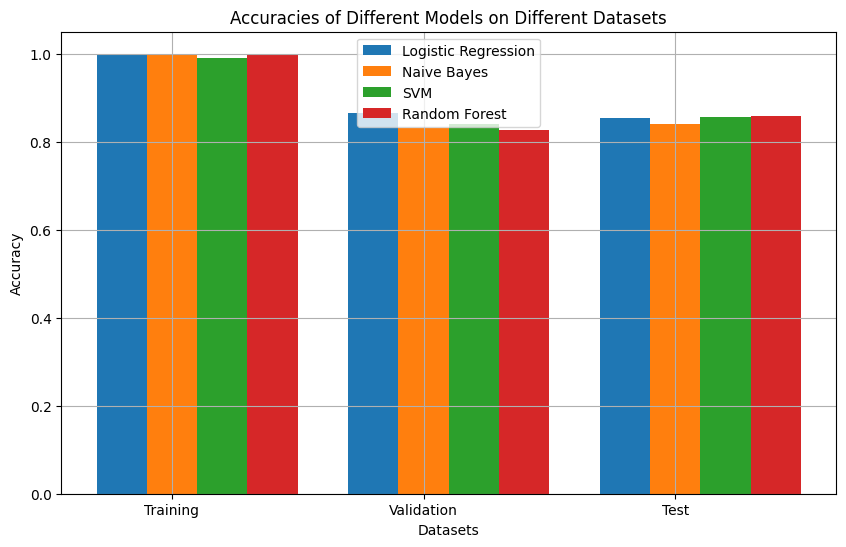

In [49]:
# Defining the datasets and their corresponding accuracies
datasets = ['Training', 'Validation', 'Test']
models = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest']
accuracies = {
    'Logistic Regression': [accuracy_train_lr, accuracy_val_lr, accuracy_test_lr],
    'Naive Bayes': [accuracy_train_nb, accuracy_val_nb, accuracy_test_nb],
    'SVM': [accuracy_train_svm, accuracy_val_svm, accuracy_test_svm],
    'Random Forest': [accuracy_train_rf, accuracy_val_rf, accuracy_test_rf]
}

# Setting the width of each bar
bar_width = 0.2

# Creating the positions of the bars on the x-axis
bar_positions = np.arange(len(datasets))

# Creating the grouped bar chart
plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    plt.bar(bar_positions + i * bar_width, accuracies[model], width=bar_width, label=model)

# Adding labels and legend
plt.xlabel('Datasets')
plt.ylabel('Accuracy')
plt.title('Accuracies of Different Models on Different Datasets')
plt.xticks(bar_positions + bar_width, datasets)
plt.legend()

# Showing the plot
plt.grid(True)
plt.show()


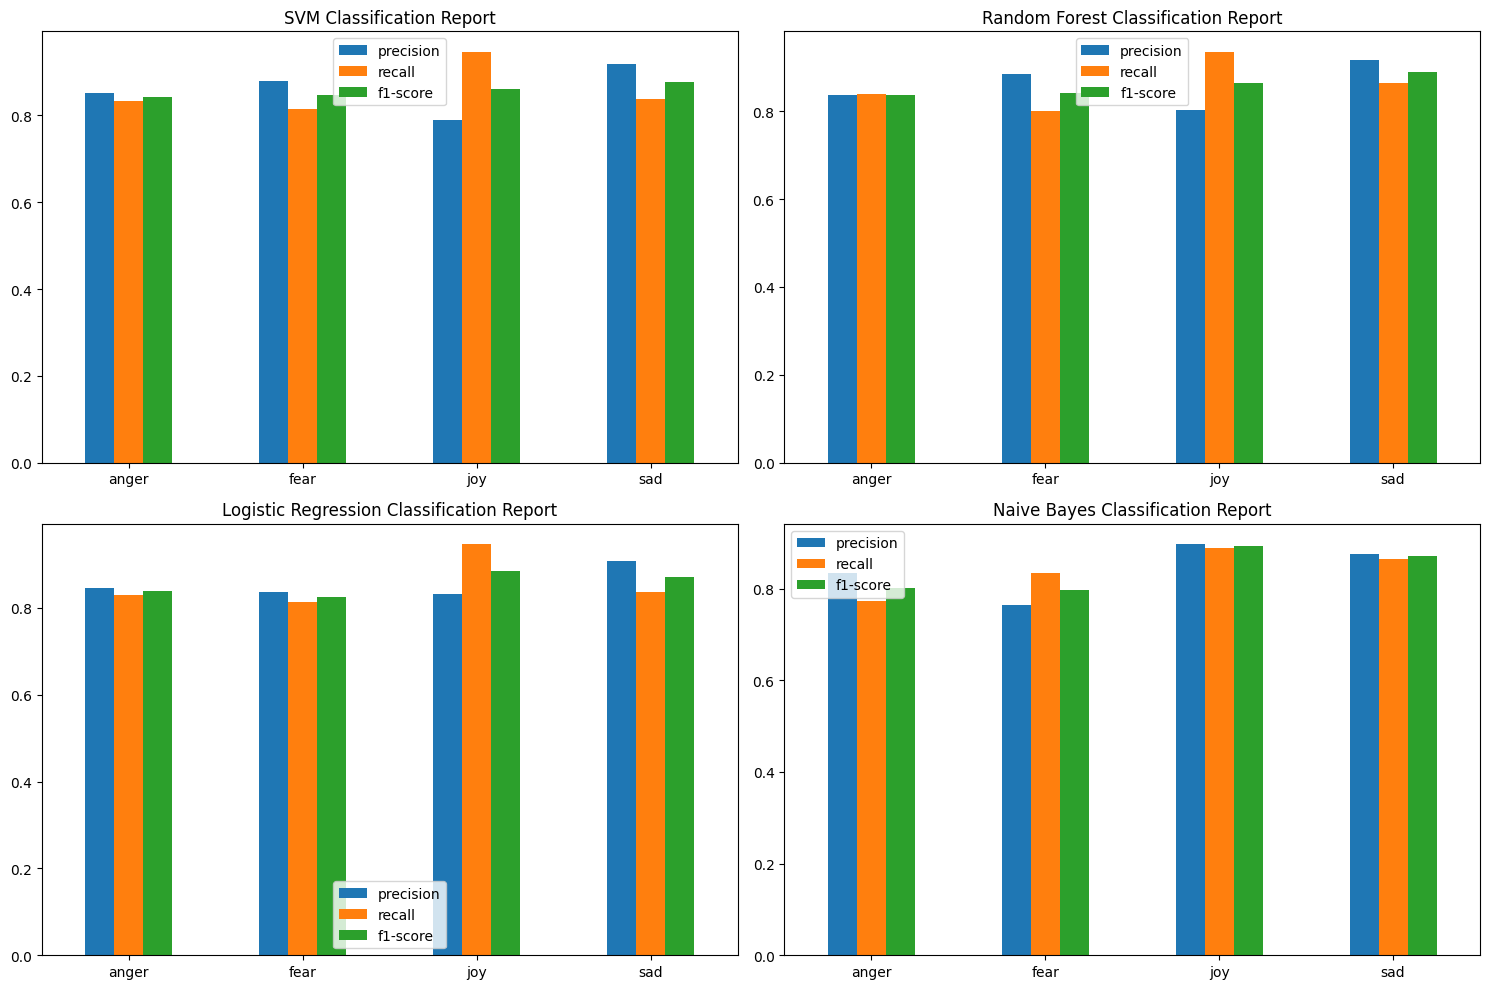

In [63]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Assuming you haveclassification_report(y_test_original, y_pred_test_lr, output_dict=True) stored classification reports for all models in variables:
# svm_classification_report, rf_classification_report, lr_classification_report, nb_classification_report
svm_classification_report = classification_report(y_test_original, y_pred_test_original, output_dict=True)
rf_classification_report = classification_report(y_test_original, y_pred_test_rf, output_dict=True)
lr_classification_report = classification_report(y_test_original, y_pred_test_lr, output_dict=True)
nb_classification_report = classification_report(y_test_original, y_pred_test_nb, output_dict=True)
# Convert the classification reports to DataFrames for easy manipulation
svm_df = pd.DataFrame(svm_classification_report).transpose()
rf_df = pd.DataFrame(rf_classification_report).transpose()
lr_df = pd.DataFrame(lr_classification_report).transpose()
nb_df = pd.DataFrame(nb_classification_report).transpose()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot SVM classification report
svm_df.iloc[:-3, :-1].plot(kind='bar', ax=axes[0, 0], rot=0)
axes[0, 0].set_title('SVM Classification Report')

# Plot Random Forest classification report
rf_df.iloc[:-3, :-1].plot(kind='bar', ax=axes[0, 1], rot=0)
axes[0, 1].set_title('Random Forest Classification Report')

# Plot Logistic Regression classification report
lr_df.iloc[:-3, :-1].plot(kind='bar', ax=axes[1, 0], rot=0)
axes[1, 0].set_title('Logistic Regression Classification Report')

# Plot Naive Bayes classification report
nb_df.iloc[:-3, :-1].plot(kind='bar', ax=axes[1, 1], rot=0)
axes[1, 1].set_title('Naive Bayes Classification Report')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [71]:
# Sentence to test
test_sentence = "I got diagnosed with cancer."

# Preprocess the test sentence
preprocessed_sentence = preprocess_text(test_sentence)

# Vectorize the preprocessed test sentence using the same CountVectorizer used during training
stop = set(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error='replace', stop_words=list(stop))
X_train_counts = vectorizer.fit_transform(X_train.values)
X_test = vectorizer.transform([preprocessed_sentence])

# Initialize the Logistic Regression classifier
#logistic_regression_classifier = LogisticRegression(max_iter=1000)

# Train the classifier on the original training data
logistic_regression_classifier.fit(X_train_counts, y_train)

# Make predictions using the Logistic Regression model
logistic_regression_prediction = logistic_regression_classifier.predict(X_test)

# Print the prediction
print("Logistic Regression Prediction:", logistic_regression_prediction[0])

# Initialize the Random Forest
random_forest_classifier = RandomForestClassifier()

# Train the classifier on the original training data
random_forest_classifier.fit(X_train_counts, y_train)

# Make predictions using the Logistic Regression model
random_forest_prediction = random_forest_classifier.predict(X_test)

# Print the prediction
print("Random Forest Prediction:", random_forest_prediction[0])


Logistic Regression Prediction: fear
Random Forest Prediction: joy
